In [4]:
!pip install -q transformers nltk rouge-score wordcloud

  Preparing metadata (setup.py) ... done


In [5]:
import json
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline
from rouge_score import rouge_scorer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
from google.colab import files
uploaded = files.upload()

Saving CUAD_v1.json to CUAD_v1.json


In [7]:
with open("CUAD_v1.json", "r") as f:
    data = json.load(f)

contracts = data['data']
texts = [p['context'] for contract in contracts for p in contract['paragraphs']]
df = pd.DataFrame(texts, columns=["text"])
df = df.dropna().head(20)

In [8]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r"[^a-zA-Z ]", "", text.lower())
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(lemmas)

df['processed_text'] = df['text'].apply(preprocess)

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W', ' ', str(text).lower())
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(lemmatizer.lemmatize(w)) for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

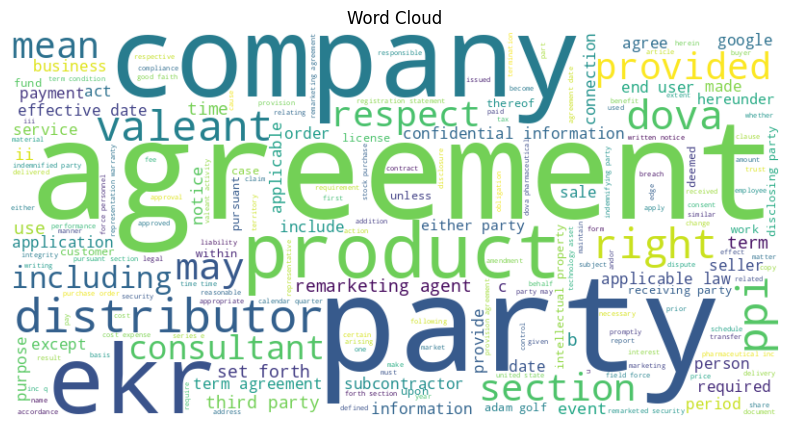

In [9]:
text_all = " ".join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()

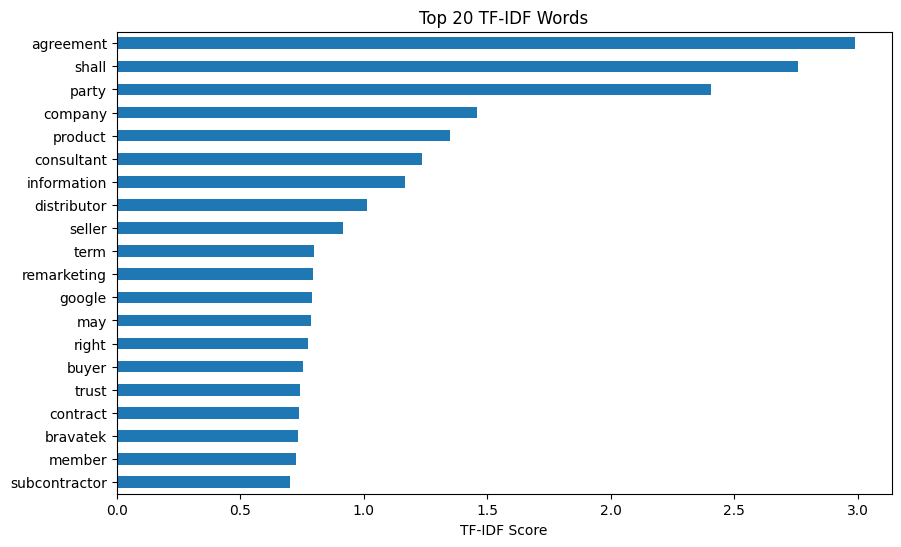

In [10]:
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
top_words = tfidf_df.sum().sort_values(ascending=False).head(20)

top_words.plot(kind='barh', figsize=(10,6), title="Top 20 TF-IDF Words")
plt.gca().invert_yaxis()
plt.xlabel("TF-IDF Score")
plt.show()

In [11]:
bart = pipeline("summarization", model="facebook/bart-large-cnn")
t5 = pipeline("summarization", model="t5-small")
pegasus = pipeline("summarization", model="google/pegasus-xsum")
distilbart = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")
samsum = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


In [12]:
def summarize(model, text, max_len=300):
    return model(text[:1024], max_length=max_len, min_length=30, do_sample=False)[0]['summary_text']

df['bart_summary'] = df['text'].apply(lambda x: summarize(bart, x))
df['t5_summary'] = df['text'].apply(lambda x: summarize(t5, "summarize: " + x[:512]))
df['pegasus_summary'] = df['text'].apply(lambda x: summarize(pegasus, x))
df['distilbart_summary'] = df['text'].apply(lambda x: summarize(distilbart, x))
df['samsum_summary'] = df['text'].apply(lambda x: summarize(samsum, x))

Your max_length is set to 300, but your input_length is only 271. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=135)
Your max_length is set to 300, but your input_length is only 244. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=122)
Your max_length is set to 300, but your input_length is only 221. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=110)
Your max_length is set to 300, but your input_length is only 290. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1

In [17]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def evaluate_rouge(references, candidates):
    scores = [scorer.score(ref, pred) for ref, pred in zip(references, candidates)]
    avg = {}
    for metric in ['rouge1', 'rouge2', 'rougeL']:
        avg[metric] = {
            'precision': sum(s[metric].precision for s in scores) / len(scores),
            'recall': sum(s[metric].recall for s in scores) / len(scores),
            'f1': sum(s[metric].fmeasure for s in scores) / len(scores),
        }
    return avg

models = ['bart_summary', 't5_summary', 'pegasus_summary', 'distilbart_summary', 'samsum_summary']
results = {model: evaluate_rouge(df['text'], df[model]) for model in models}
pd.DataFrame(results)

,bart_summary,t5_summary,pegasus_summary,distilbart_summary,samsum_summary
rouge1,"{'precision': 0.9949594486449038, 'recall': 0....","{'precision': 0.9848987511671335, 'recall': 0....","{'precision': 0.8253826618811025, 'recall': 0....","{'precision': 0.9954453441295547, 'recall': 0....","{'precision': 0.9872769138353412, 'recall': 0...."
rouge2,"{'precision': 0.9092455053122904, 'recall': 0....","{'precision': 0.8908364420415331, 'recall': 0....","{'precision': 0.3684595504415003, 'recall': 0....","{'precision': 0.9091683443304339, 'recall': 0....","{'precision': 0.781755288273716, 'recall': 0.0..."
rougeL,"{'precision': 0.96751051827666, 'recall': 0.02...","{'precision': 0.9403423361337637, 'recall': 0....","{'precision': 0.6761379355232255, 'recall': 0....","{'precision': 0.9531825370213646, 'recall': 0....","{'precision': 0.8874447606510933, 'recall': 0...."


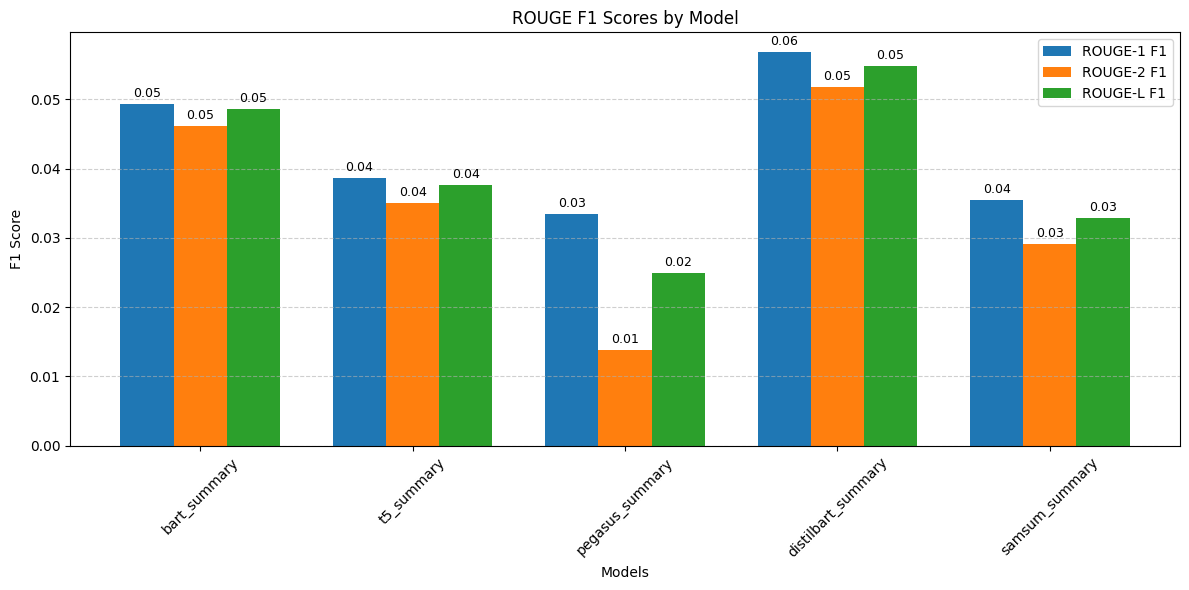

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and ROUGE types
model_names = list(results.keys())
rouge_types = ['rouge1', 'rouge2', 'rougeL']

# Get F1 scores
f1_scores = {rouge: [results[model][rouge]['f1'] for model in model_names] for rouge in rouge_types}
x = np.arange(len(model_names))  # model positions
width = 0.25  # bar width

# Plot setup
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width, f1_scores['rouge1'], width, label='ROUGE-1 F1')
bars2 = plt.bar(x, f1_scores['rouge2'], width, label='ROUGE-2 F1')
bars3 = plt.bar(x + width, f1_scores['rougeL'], width, label='ROUGE-L F1')

# Add value labels above bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # offset text
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Final styling
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('ROUGE F1 Scores by Model')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()